# Titanic Disaster

Bu tekrar bölümünde, farklı özelliklere sahip tüm yolcuları listeleyen ünlü  [Titanic](https://drive.google.com/file/d/1td-RTqXsV0Cc3z6Ad3Vk-15bH42L40aY/view) veri setini inceleyeceğiz.

❓`matplotlib`, `numpy` ve `pandas` kütüphanelerini her zamanki şekilde yükleyerek başla.

In [70]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

❓CSV verisini yükleyip `titanic_df` adlı bir değişkene ata.

CSV dosyasına şu URL’den ulaşılabilir: https://drive.google.com/file/d/1td-RTqXsV0Cc3z6Ad3Vk-15bH42L40aY/view

<details>
    <summary>💡 <strong>Hint</strong> - Click to reveal</summary>
    Try using <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html"><code>pandas.DataFrame.read_csv</code></a>
</details>

In [71]:
titanic_df = pd.read_csv("ML_Titanic_dataset2.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


❓ Veri setini her zamanki yöntemlerle incele (`shape`, `dtypes`, `describe()`, `info()`, `isnull().sum()`).

 `B` tuşuna basarak yeni hücreler eklemekten çekinme.

In [72]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [73]:
titanic_df.shape

(891, 12)

In [74]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [75]:
titanic_df.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

In [76]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

687 satırda  `Cabin` 687 satırda  bilgisinin eksik olduğu (NaN olduğu) görülüyor.

❓`titanic_df` içerisindeki  `Cabin` sütunundan kurtulmak için [`pandas.DataFrame.drop`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) fonksiyonunu kullan.

In [77]:
titanic_df.drop(columns=["Cabin"], inplace=True)

## Classes Analysis

Bilet dağılımına bir göz atalım.

❓ Bir `groupby()`,kullanarak, her sınıf (1, 2 veya 3) için satılan bilet sayısını hesaplayan bir`pclass_df` dataframe oluştur.

In [78]:
pclass_df = titanic_df.groupby("Pclass").size().to_frame(name="ticket_count")
pclass_df

,ticket_count
Pclass,
1,216
2,184
3,491


Sayıya bakmak çok görsel değil, veriyi bir grafikle anlamlandırmayı deneyelim.

❓ Bir önceki soruda oluşturduğun `pclass_df` dataframe’ini bir bar chart olarak plot et.

<Axes: xlabel='Pclass'>

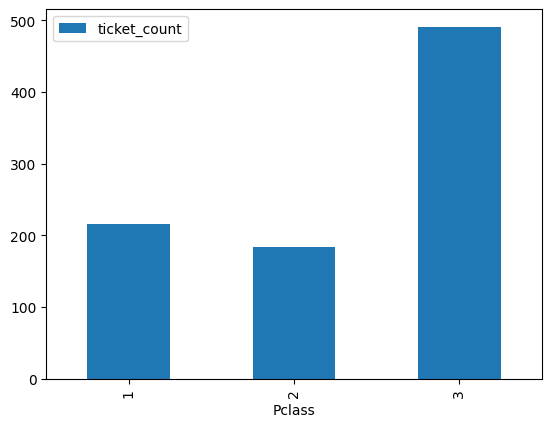

In [79]:
pclass_df.plot(kind="bar")

Şimdi hayatta kalanlara **survivors** bakalım.

❓ Her yolcu sınıfının hayatta kalma oranını  *survival rate* gösteren bir bar chart plot et.
`0` ,  o sınıfta kimsenin hayatta kalmadığı, `1` ise herkesin hayatta kaldığı anlamına gelir. 

Text(0.5, 0, 'Passenger Class')

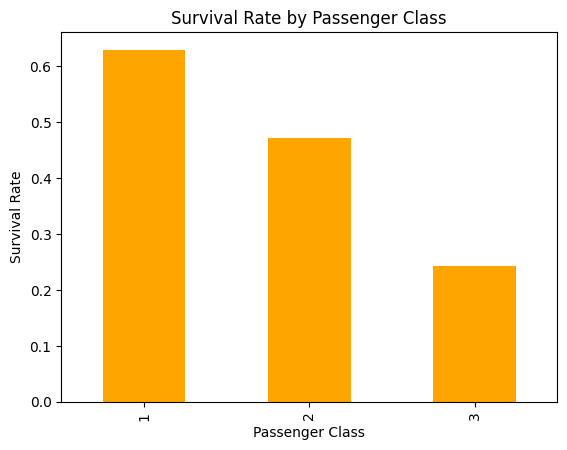

In [80]:
survival_rate = titanic_df.groupby("Pclass")["Survived"].mean()

survival_rate.plot(kind="bar", color="orange")
ax = survival_rate.plot(kind="bar", color="orange")
ax.set_title("Survival Rate by Passenger Class")
ax.set_ylabel("Survival Rate")
ax.set_xlabel("Passenger Class")

### Gender Analysis

`Sex`  sütununa bir göz atalım.

❓ Bu sütunda kullanılan farklı değerleri kontrol etmek için [`pandas.Series.unique`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html) fonksiyonunu kullan.

In [81]:
titanic_df["Sex"].unique()

array(['male', 'female'], dtype=object)

❓ Her cinsiyetin hayatta kalma oranını *survival rate*  gösteren bir bar chart plot et.
Verilere göre, hangi cinsiyetin hayatta kalma ihtimali daha yüksekti?

Text(0.5, 0, 'Sex')

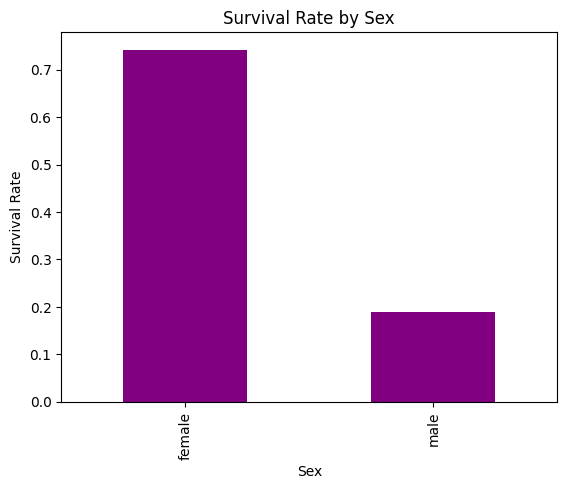

In [82]:
sex_survival = titanic_df.groupby("Sex")["Survived"].mean().plot(kind="bar", color="purple")
ax = sex_survival
ax.set_title("Survival Rate by Sex")
ax.set_ylabel("Survival Rate")
ax.set_xlabel("Sex")


Her cinsiyet için toplam yolcu sayısını ve toplam hayatta kalan sayısını birlikte gösterdiğimiz daha şık bir histogram oluşturalım.

❓`Total` ve `Survived`  olmak üzere iki sütunlu, `male` and `female` şeklinde iki satırlı bir `survivors_df` DataFrame oluştur ve plot et.

<Axes: xlabel='Sex'>

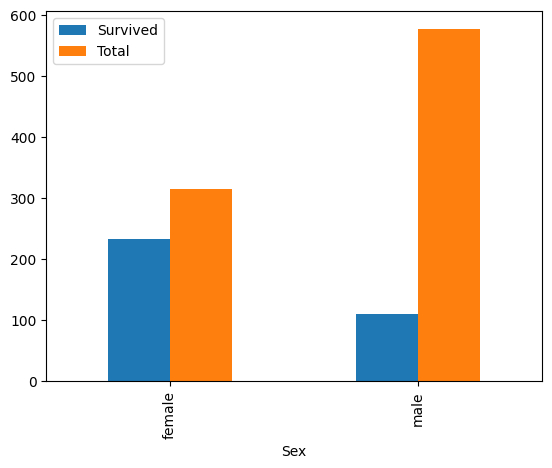

In [83]:
survivors_df = titanic_df[['Survived', 'Sex']].groupby('Sex').sum()
survivors_df['Total'] = titanic_df[['Survived', 'Sex']].groupby('Sex').count()
survivors_df.plot(kind='bar')

## Children

Önceki analiz yaşları dikkate almıyordu. Bir çocuğu bir yetişkinden ayırmak ve bunun hayatta kalma oranlarını *survival rates* nasıl etkilediğini görmek istiyoruz.

❓ Boolean indexing kullanarak yalnızca çocuk yolcuların satırlarını içeren bir `children_df` oluştur.

In [84]:
children_df = titanic_df[titanic_df["Age"] <= 18]
children_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,Q


❓ Titanic’te kaç çocuk vardı?

In [85]:
children_df.shape[0]

139

❓Kaç çocuk hayatta kaldı?

In [86]:
children_df["Survived"].sum()

np.int64(70)

❓ Her kategori için( `male`, `female`, `children`).hayatta kalanlar / toplam oranını gösteren bir bar chart plot et. Unutma: `male` istatistiklerinden erkek çocukları, `female` istatistiklerinden ise kız çocukları çıkarman **substract** gerekiyor.

In [87]:
survivors_df.loc['children'] = [children_df['Survived'].sum(), children_df.shape[0]]
survivors_df


,Survived,Total
Sex,,
female,233,314
male,109,577
children,70,139


In [88]:
children_gender_df = children_df[['Survived', 'Sex']].groupby('Sex').sum()
children_gender_df['Total'] = children_df[['Survived', 'Sex']].groupby('Sex').count()
children_gender_df.loc['children'] = [ 0, 0 ]
children_gender_df

,Survived,Total
Sex,,
female,46,68
male,24,71
children,0,0


<Axes: xlabel='Sex'>

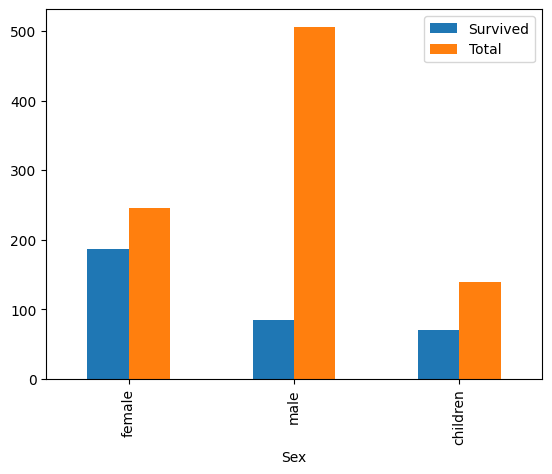

In [89]:
(survivors_df - children_gender_df).plot(kind='bar')